In [26]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

In [27]:
service='pet-bokeh-service'
port=8500
image_path='cat.jpg'

In [28]:
requests.get(f'http://{service}:{port}/v1/models/pet-bokeh/metadata').json()

{'model_spec': {'name': 'pet-bokeh', 'signature_name': '', 'version': '1'},
 'metadata': {'signature_def': {'signature_def': {'serving_default': {'inputs': {'Input': {'dtype': 'DT_FLOAT',
       'tensor_shape': {'dim': [{'size': '-1', 'name': ''},
         {'size': '160', 'name': ''},
         {'size': '160', 'name': ''},
         {'size': '3', 'name': ''}],
        'unknown_rank': False},
       'name': 'serving_default_Input:0'}},
     'outputs': {'Output': {'dtype': 'DT_FLOAT',
       'tensor_shape': {'dim': [{'size': '-1', 'name': ''},
         {'size': '160', 'name': ''},
         {'size': '160', 'name': ''},
         {'size': '3', 'name': ''}],
        'unknown_rank': False},
       'name': 'StatefulPartitionedCall:0'}},
     'method_name': 'tensorflow/serving/predict'},
    '__saved_model_init_op': {'inputs': {},
     'outputs': {'__saved_model_init_op': {'dtype': 'DT_INVALID',
       'tensor_shape': {'dim': [], 'unknown_rank': True},
       'name': 'NoOp'}},
     'method_name':

In [29]:
img = image.img_to_array(image.load_img(image_path, target_size=(160, 160))) / 255
data = json.dumps({"signature_name": "",
   "instances": [img.tolist()]
})
headers = {"content-type": "application/json"}

In [30]:
response = requests.post(f'http://{service}:{port}/v1/models/pet-bokeh:predict', data=data, headers=headers)

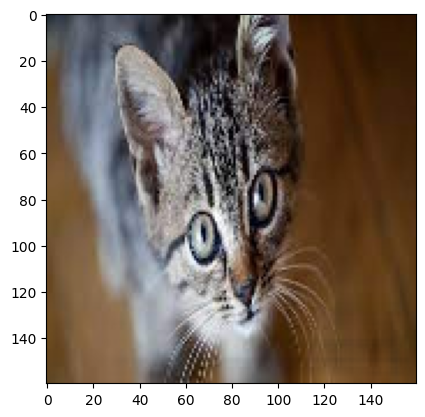

In [56]:
plt.imshow(np.array(response.json()['predictions'])[0][:,:,1][:,:,np.newaxis]*img)